# Dataloader Test

In [2]:
from dataloader import PendulumDataloader
from training import Training

In [3]:
training = Training()
dataloader = PendulumDataloader(training)

In [4]:
dataloader.all_data_shape()

(2000, 100, 24, 24, 1) float32
(2000, 100, 2) float32
(1000, 100, 24, 24, 1) float32
(1000, 100, 2) float32
(1000, 100, 24, 24, 1) float32
(1000, 100, 2) float32


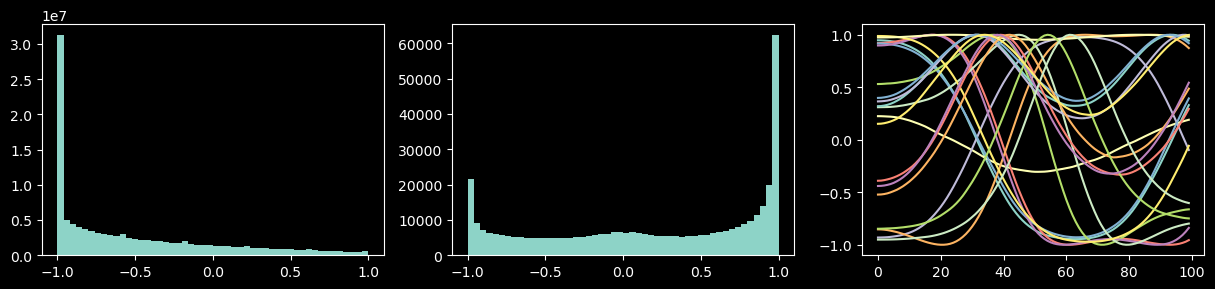

In [40]:
dataloader.plot_data_and_targets(data_type='train', plot_targets=(500,510))

In [5]:
a, b = dataloader.batch_data()

In [6]:
a.shape

(64, 40, 24, 24, 1)

In [7]:
b.shape

(64, 40, 2)

In [10]:
import jax.numpy as np
prepad = np.array(np.pad(a, ((0, 0), (20, 0), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0))
postpad = np.array(np.pad(a, ((0, 0), (0, 20), (0, 0), (0, 0), (0, 0)), mode='constant', constant_values=0))
print(prepad)
print(postpad)
print(prepad.shape)
print(postpad.shape)

[[[[[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   ...

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]]


  [[[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.        ]
    ...
    [ 0.        ]
    [ 0.        ]
    [ 0.        ]]

   [[ 0.        ]
    [ 0.        ]
    [ 0.  

# Learner Test

In [1]:
from learner import Learner
from training import Training

In [2]:
training = Training()
learner = Learner(training)

In [3]:
learner.get_trainable_parameters()

[*] Trainable Parameters: 8664


In [14]:
learner.show_parameters()

AttributeError: "VmapGaussianRegressionModel" object has no attribute "<lambda>". If "<lambda>" is defined in '.setup()', remember these fields are only accessible from inside 'init' or 'apply'.

In [15]:
learner.print_shapes()

decoder_lvar.layers_0.bias (30,) float32
decoder_lvar.layers_0.kernel (32, 30) float32
decoder_lvar.layers_1.bias (2,) float32
decoder_lvar.layers_1.kernel (30, 2) float32
decoder_mu.layers_0.bias (30,) float32
decoder_mu.layers_0.kernel (32, 30) float32
decoder_mu.layers_1.bias (2,) float32
decoder_mu.layers_1.kernel (30, 2) float32
encoder.encoder.bias (32,) float32
encoder.encoder.kernel (1, 32) float32
encoder.layers_0.norm.bias (32,) float32
encoder.layers_0.norm.scale (32,) float32
encoder.layers_0.out2.bias (32,) float32
encoder.layers_0.out2.kernel (32, 32) float32
encoder.layers_0.seq.B (16, 32, 2) float32
encoder.layers_0.seq.C (32, 16, 2) float32
encoder.layers_0.seq.D (32,) float32
encoder.layers_0.seq.Lambda_im (16,) float32
encoder.layers_0.seq.Lambda_re (16,) float32
encoder.layers_0.seq.log_step (16, 1) float32
encoder.layers_1.norm.bias (32,) float32
encoder.layers_1.norm.scale (32,) float32
encoder.layers_1.out2.bias (32,) float32
encoder.layers_1.out2.kernel (32, 32)

In [34]:
# learning_rate_fn = learner.create_learning_rate_fn()
learning_rate_fn = learner.exponential_decay_fn

In [36]:
learning_rate_fn(1000)

0.001

# RNG Test

In [5]:
from jax import random

In [17]:
key = random.key(69)
key

Array((), dtype=key<fry>) overlaying:
[ 0 69]

In [18]:
init_rng, train_rng = random.split(key, num=2)
print(init_rng)
print(train_rng)

Array((), dtype=key<fry>) overlaying:
[3746304321 1047182288]
Array((), dtype=key<fry>) overlaying:
[3745723190 1458479275]


In [19]:
key = random.PRNGKey(69)
key

Array([ 0, 69], dtype=uint32)

In [20]:
init_rng, train_rng = random.split(key, num=2)
print(init_rng)
print(train_rng)

[3746304321 1047182288]
[3745723190 1458479275]


In [21]:
key, noise_rng, test_rng = random.split(key, num=3)
print(key, noise_rng, test_rng)

[2814327745 2391496948] [1174026990 2603783245] [2720540706 1040765532]


# SSM Test

In [3]:
from s5 import S5
from training import Training

In [4]:
training = Training()
s5 = S5(training.configs['s5_params']).s5

In [5]:
s5

VmapGaussianRegressionModel(
    # attributes
    ssm = functools.partial(<class 'S5.s5.ssm.S5SSM'>, H=32, P=16, Lambda_re_init=Array([-0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994], dtype=float32), Lambda_im_init=Array([-19.857405 ,  -5.3542137,  -1.9577932,  -0.427489 , -19.857405 ,
            -5.3542137,  -1.9577932,  -0.427489 , -19.857405 ,  -5.3542137,
            -1.9577932,  -0.427489 , -19.857405 ,  -5.3542137,  -1.9577932,
            -0.427489 ], dtype=float32), V=Array([[ 0.10672937-0.07382672j,  0.06078995+0.16030367j,
             0.02548362+0.2896217j ,  0.6058039 +0.0473051j ,
             0.        +0.j        ,  0.        +0.j        ,
             0.        +0.j        ,  0.        +0.j        ,
             0.        +0.j        ,  0.        +0.j        ,
             0.    

In [6]:
import jax.numpy as np

dummy_input = np.ones((128, 576, 1))
dummy_input.shape

(128, 576, 1)

In [7]:
from jax import random

variables = s5.init({"params": random.key(0), "dropout": random.key(69)}, dummy_input, None)
params = variables["params"]
batch_stats = variables['batch_stats']

In [8]:
params

{'decoder_lvar': {'layers_0': {'bias': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
   'kernel': Array([[ 3.63334328e-01,  2.30839476e-02, -2.08379686e-01,
            2.25471482e-02, -7.60169476e-02,  2.87123889e-01,
           -1.85495857e-02, -4.01974246e-02,  5.88344373e-02,
           -9.15718824e-02,  1.74994111e-01,  3.26221675e-01,
           -1.40870556e-01,  1.87742580e-02,  2.70642072e-01,
            3.02689165e-01,  1.08292259e-01,  1.46745190e-01,
           -5.68072610e-02, -1.36193231e-01, -1.45778880e-01,
            2.48315468e-01, -3.09406281e-01, -1.85869545e-01,
            1.49897069e-01,  2.19488934e-01, -2.84435391e-01,
           -2.84056365e-01,  2.29258850e-01,  1.04113244e-01],
          [-3.12661022e-01, -3.48053068e-01,  2.50794023e-01,
            2.62805670e-01, -1.34765180e-02, -1.71259627e-01,
           -2.95254439e-01, -2.13739812e-01,  1.1697

In [10]:
batch_stats

{'encoder': {'layers_0': {'norm': {'mean': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32),
    'var': Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],      dtype=float32)}},
  'layers_1': {'norm': {'mean': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float32),
    'var': Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
           1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],      dtype=float32)}}}}

In [37]:
mean, var = s5.apply({"params": params}, dummy_input, None, rngs={"dropout": random.key(69)})

In [38]:
mean.shape

(128, 576, 2)

In [39]:
var.shape

(128, 576, 2)

In [40]:
import optax
from flax.training import train_state

def create_learning_rate_fn():
    warmup_fn = optax.linear_schedule(init_value=0., end_value=0.001, transition_steps=2000)
    cosine_fn = optax.cosine_decay_schedule(init_value=0.001, decay_steps=18000)
    schedule_fn = optax.join_schedules(schedules=[warmup_fn, cosine_fn], boundaries=[2000])
    return schedule_fn

def create_train_state(learning_rate_fn):
    tx = optax.adamw(learning_rate_fn, weight_decay=0.1)
    return train_state.TrainState.create(apply_fn=s5.apply, params=params, tx=tx)

In [41]:
learning_rate_fn = create_learning_rate_fn()

In [42]:
tx = optax.adamw(learning_rate_fn, weight_decay=0.1)
state = train_state.TrainState.create(apply_fn=s5.apply, params=params, tx=tx)

In [43]:
state

TrainState(step=0, apply_fn=<bound method Module.apply of VmapGaussianRegressionModel(
    # attributes
    ssm = functools.partial(<class 'S5.s5.ssm.S5SSM'>, H=32, P=16, Lambda_re_init=Array([-0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994, -0.49999994, -0.49999994, -0.49999994, -0.49999994,
           -0.49999994], dtype=float32), Lambda_im_init=Array([-19.857405 ,  -5.3542137,  -1.9577932,  -0.427489 , -19.857405 ,
            -5.3542137,  -1.9577932,  -0.427489 , -19.857405 ,  -5.3542137,
            -1.9577932,  -0.427489 , -19.857405 ,  -5.3542137,  -1.9577932,
            -0.427489 ], dtype=float32), V=Array([[ 0.10672937-0.07382672j,  0.06078995+0.16030367j,
             0.02548362+0.2896217j ,  0.6058039 +0.0473051j ,
             0.        +0.j        ,  0.        +0.j        ,
             0.        +0.j        ,  0.        +0.j        ,
             0.        

In [49]:
mean, var = state.apply_fn({'params': params}, dummy_input, None, rngs={'dropout': random.key(69)})
mean, var = mean[:,-1,:], var[:,-1,:]

In [50]:
mean.shape

(128, 2)

In [51]:
var.shape

(128, 2)

# Training Test

In [1]:
from metrics import Metrics
from dataloader import PendulumDataloader
from learner import Learner
from training import Training

In [2]:
training = Training()
metrics = Metrics(training)
dataloader = PendulumDataloader(training)
learner = Learner(training)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ghostkiller2070. Use `wandb login --relogin` to force relogin


../wandb/debug.log has been deleted.
../wandb/debug-internal.log has been deleted.






In [3]:
training.train(metrics, dataloader, learner)

/home/ghostkiller/miniconda3/envs/S5/lib/python3.11/site-packages/jax/_src/lax/lax.py:2690: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)


Step: 19/20000





Learning Rate,▂▃▅▆██████▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
Train Loss,█▄▂▂▂▂▂▂▂▁▂▁▂▁▂▂▁▁▁▂▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
Val Loss,█▄▃▃▂▃▂▂▂▂▂▂▁▁▂▁▂▁▁▂▂▁▁▁▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁
Learning Rate,0.0
Train Loss,0.04671
Val Loss,0.14706


In [4]:
metrics.close_writer()

Learning Rate,▁▂▄▆████████████▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄
Train Loss,▄▂▁▁▁▁█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Val Loss,▂▂▁▁▁▁▁█▂▂▂▃▃▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▃▃▂▃▃▃▃▃▃▃
Learning Rate,0.00055
Train Loss,1.83176
Val Loss,0.79972


# Testing Random Stuff

In [8]:
import numpy as np

# Dummy data with varying sequence lengths
data = [np.array([[1, 2], [3, 4], [5, 6]]),
        np.array([[7, 8], [9, 10]]),
        np.array([[11, 12], [13, 14], [15, 16], [17, 18]])]

max_length = 4  # Set the maximum length you want to pad to
padded_data = np.array([np.pad(seq, ((max_length - len(seq), 0), (0, 0)), mode='constant', constant_values=0) for seq in data])

print(padded_data)

[[[ 0  0]
  [ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 0  0]
  [ 0  0]
  [ 7  8]
  [ 9 10]]

 [[11 12]
  [13 14]
  [15 16]
  [17 18]]]
